# Bagging (회귀) 기본코드

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.regression import *

# 배깅 회귀
from sklearn.ensemble import BaggingRegressor

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)


상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 

### [3] 훈련/검증 데이터 분할 및 데이터 표준화

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, 'MEDV', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## #02. 기본 Bagging

### [1] 이 데이터에 대한 최적 모형 찾기

[core.py:254] <class 'TypeError'> Parameter grid for parameter 'pruning' is not iterable or a distribution (value=False)
[<class 'sklearn.tree._classes.DecisionTreeRegressor'> 모델의 학습에 실패했습니다.
+---------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|                     |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|---------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| LinearRegression    |       0.694283 |             3.60137 |             26.0824 |          5.10709 |                         19.3308 |              -7.30724 |
| Lasso               |       0.695491 |             3.59083 |             25.9793 |          5.09699 |                         19.2874 |              -7.31053 |
| KNeighborsRegressor |       0.69

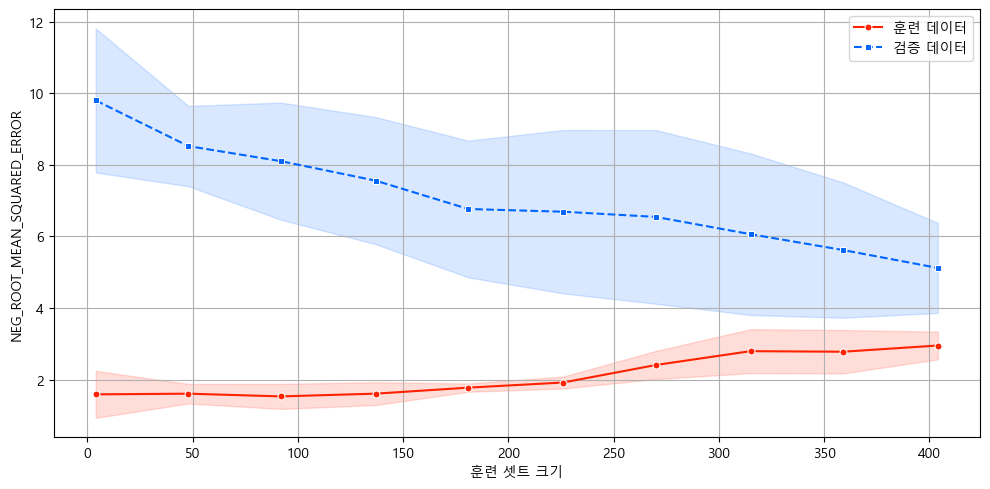

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 3.31189 |
|  1 | MEDV       | ZN         | 3.19958 |
|  2 | MEDV       | INDUS      | 4.74148 |
|  3 | MEDV       | CHAS       | 1.13018 |
|  4 | MEDV       | NOX        | 6.11484 |
|  5 | MEDV       | RM         | 2.04028 |
|  6 | MEDV       | AGE        | 3.15955 |
|  7 | MEDV       | DIS        | 4.92998 |
|  8 | MEDV       | RAD        | 10.6946 |
|  9 | MEDV       | TAX        | 12.7292 |
| 10 | MEDV       | PTRATIO    | 2.37277 |
| 11 | MEDV       | B          | 1.39447 |
| 12 | MEDV       | LSTAT      | 4.52044 |
+----+------------+------------+---------+



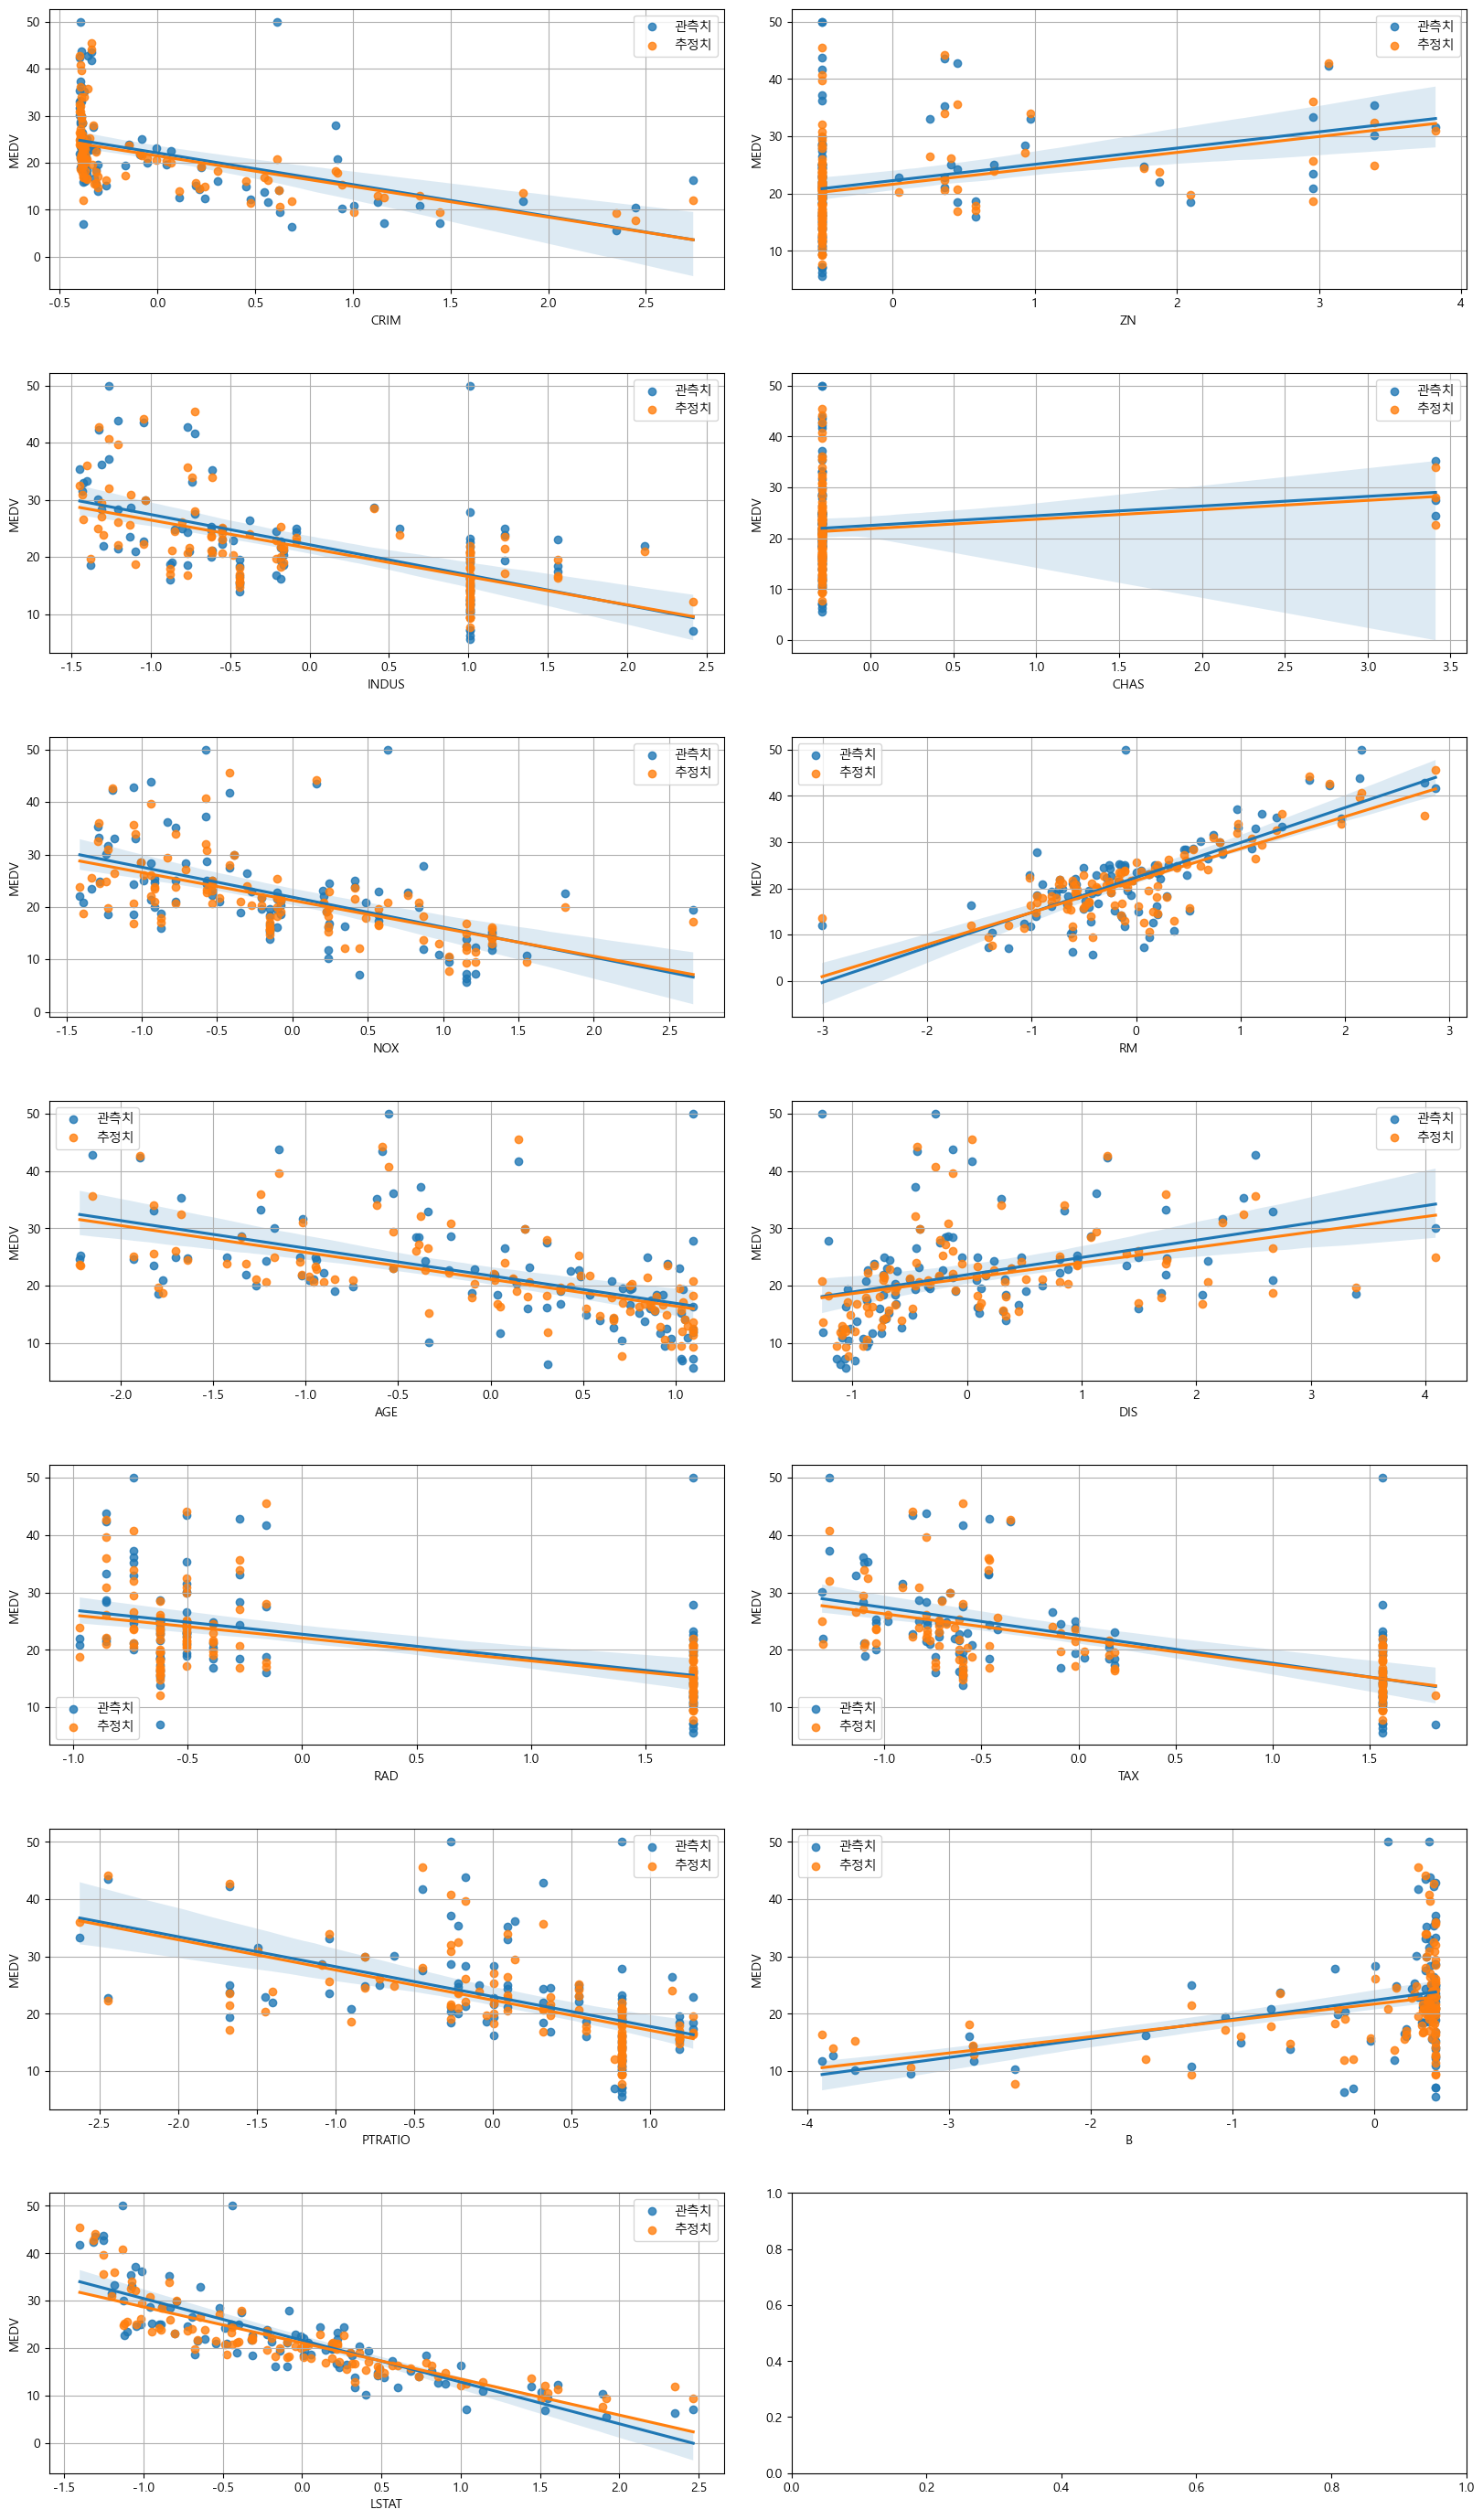

{'LinearRegression': LinearRegression(n_jobs=2),
 'Ridge': Ridge(alpha=10, max_iter=1000, random_state=1000),
 'Lasso': Lasso(alpha=0.01, random_state=1000),
 'SGDRegressor': SGDRegressor(alpha=0.001, early_stopping=True, random_state=1000),
 'KNeighborsRegressor': KNeighborsRegressor(metric='manhattan', n_jobs=2, n_neighbors=3),
 'SVR': SVR(C=10, max_iter=1000),
 'best': SVR(C=10, max_iter=1000)}

In [4]:
estimator = my_regression(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
estimator

In [5]:
estimator['best']

SVR(C=10, max_iter=1000)

### [2] Bagging 모형 구현

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    6.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.896761 |     0.819419 |
| 평균절대오차(MAE)             |      1.71816 |      2.34677 |
| 평균제곱오차(MSE)             |      8.68837 |      15.4063 |
| 평균오차(RMSE)                |       2.9476 |      3.92508 |
| 평균 절대 백분오차 비율(MAPE) |      8.07486 |      12.6621 |
| 평균 비율 오차(MPE)           |      -0.9741 |     -2.57318 |
+-------------------------------+--------------+--------------+

[학습곡선]


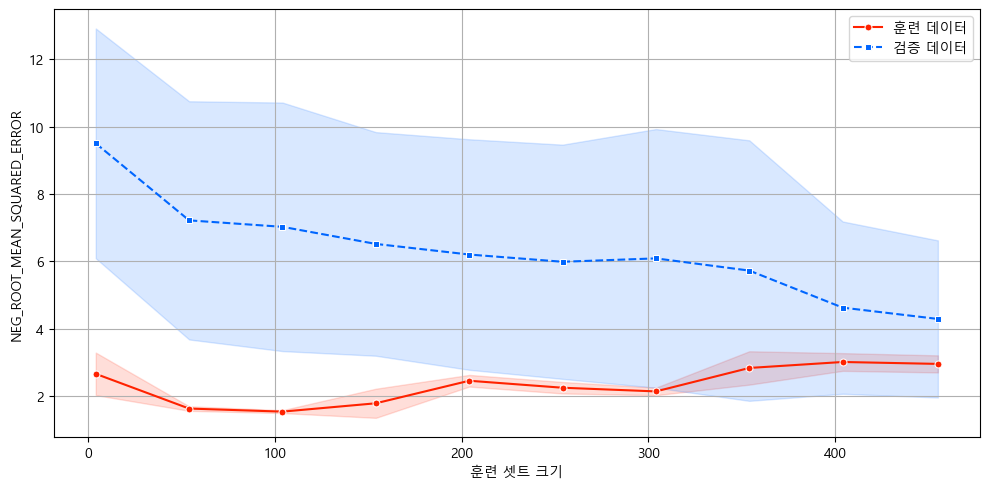

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 3.31189 |
|  1 | MEDV       | ZN         | 3.19958 |
|  2 | MEDV       | INDUS      | 4.74148 |
|  3 | MEDV       | CHAS       | 1.13018 |
|  4 | MEDV       | NOX        | 6.11484 |
|  5 | MEDV       | RM         | 2.04028 |
|  6 | MEDV       | AGE        | 3.15955 |
|  7 | MEDV       | DIS        | 4.92998 |
|  8 | MEDV       | RAD        | 10.6946 |
|  9 | MEDV       | TAX        | 12.7292 |
| 10 | MEDV       | PTRATIO    | 2.37277 |
| 11 | MEDV       | B          | 1.39447 |
| 12 | MEDV       | LSTAT      | 4.52044 |
+----+------------+------------+---------+



[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.4s finished


In [6]:
bagging = BaggingRegressor(estimator=estimator['best'], 
                            n_estimators=10, # 부트스트랩 샘플 개수
                            bootstrap=True,  # 복원 추출,  False이면 비복원 추출
                            random_state=get_random_state(),
                            
                            # 하나의 예측기에 들어가는 샘플에 대하여 컬럼의 중복 사용여부를 결정
                                # verbose =1은 설명 출력/ verbose =0은 출력 안함. (기본값)
                            bootstrap_features=False, 
                            n_jobs=get_n_jobs(), verbose=1)     

bagging.fit(X=x_train, y=y_train)

my_regression_result(estimator=bagging, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

my_regression_report(estimator=bagging, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)